<a href="https://colab.research.google.com/github/azemsah/imdb3/blob/main/imdb_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib
!pip install plotly.express

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
ntflx_veri = pd.read_csv("NetflixOriginals.csv", encoding="ISO-8859-1")
ntflx_cpy = ntflx_veri.copy()
ntflx_veri

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
ntflx_veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
ntflx_veri.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

                      Language     Runtime
0                 English/Akan  136.000000
1         Khmer/English/French  136.000000
2                      Marathi  121.666667
3               English/Korean  121.000000
4              Spanish/Catalan  116.000000
5                       Korean  115.833333
6                        Hindi  115.787879
7               English/Arabic  114.000000
8                   Indonesian  103.777778
9                      Turkish  101.800000
10                       Malay  101.000000
11                       Tamil  101.000000
12                        Thai  101.000000
13                       Dutch   99.666667
14                      German   99.600000
15                    Filipino   99.500000
16                    Japanese   99.333333
17                      Polish   98.666667
18                     Italian   98.357143
19             Spanish/English   96.000000
20                     Spanish   93.387097
21                      French   92.700000
22         

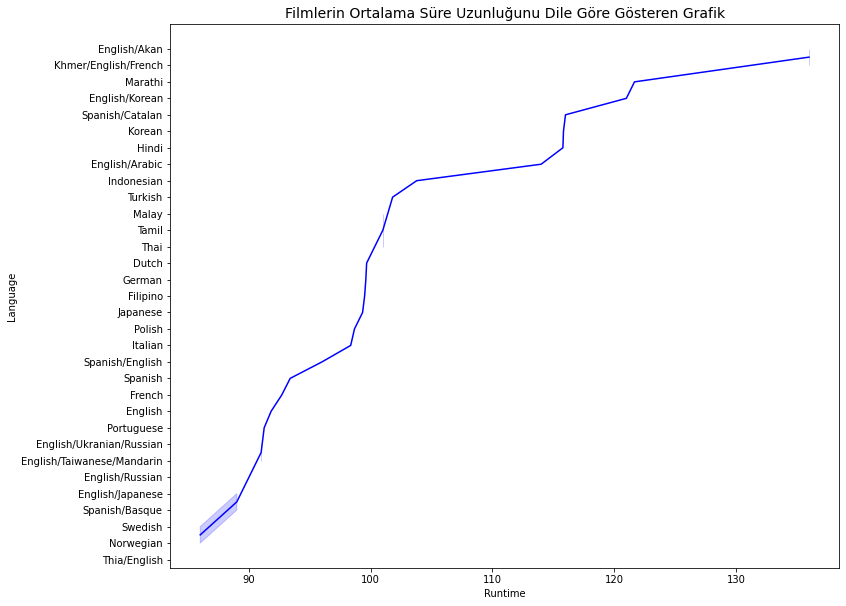

In [ ]:
ntflx_veri.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
ntflx_veri.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
rntm_srt = ntflx_veri.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False).reset_index()
print(rntm_srt)

plt.figure(figsize = (12,10))
plt.title("Filmlerin Ortalama Süre Uzunluğunu Dile Göre Gösteren Grafik",fontsize=14)
sns.lineplot(y=rntm_srt["Language"], x=rntm_srt.loc[(rntm_srt["Runtime"] >= 86)]["Runtime"], color="blue")

In [ ]:
ntflx_veri["Premiere"] = pd.to_datetime(ntflx_veri["Premiere"])
print(ntflx_veri.dtypes)

Title                 object
Genre                 object
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language              object
dtype: object


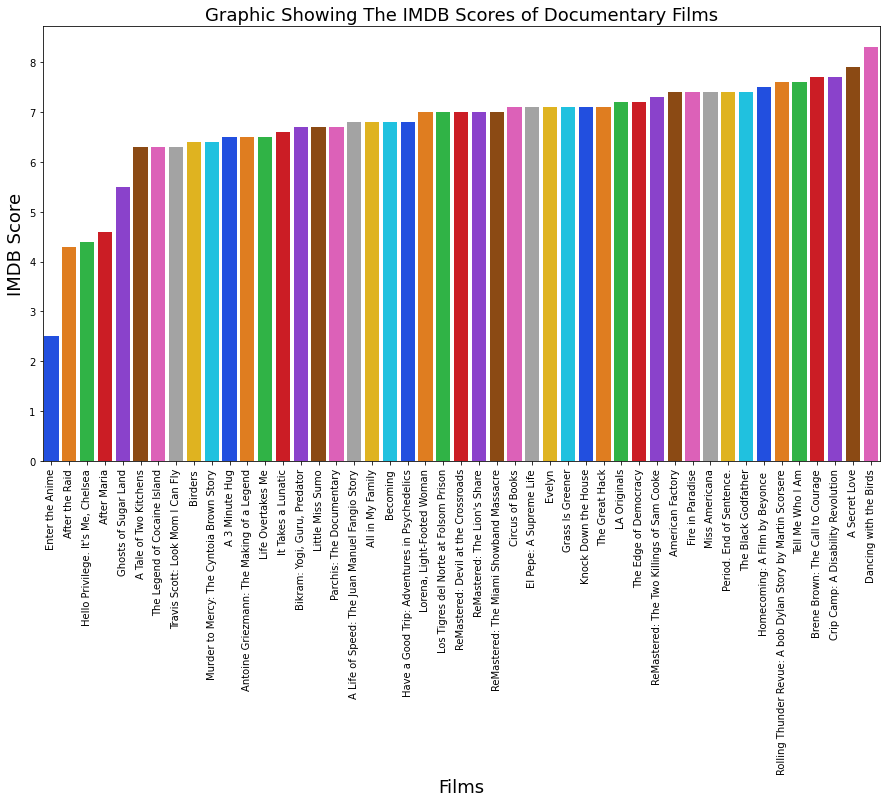

In [ ]:
DateSort = ntflx_veri.loc[(ntflx_veri["Genre"] == "Documentary") & (ntflx_veri["Premiere"] > "2019-01-31") & (ntflx_veri["Premiere"] < "2020-06-01")]
fig, ax = plt.subplots(figsize=(15,8))
rotation = sns.barplot(data = DateSort , 
                       x="Title",
                       y="IMDB Score",
                       ax=ax,
                       palette="bright")
for item in rotation.get_xticklabels():
    item.set_rotation(90)

plt.title("Graphic Showing The IMDB Scores of Documentary Films", fontsize=18)
plt.xlabel("Films", fontsize=18)
plt.ylabel("IMDB Score", fontsize=18)
plt.show()

In [ ]:
eng_scr= (ntflx_veri['Language'] =='English')
ntflx_veri[English_score].sort_values("IMDB Score", ascending=False).head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English


In [ ]:
yuk_imdb_indx = ntflx_veri[ntflx_veri["Language"] == 'English']["IMDB Score"].idxmax()
yuk_imdb = list(ntflx_veri.iloc[yuk_imdb_indx:yuk_imdb_indx+1,]["IMDB Score"])[0]
yuk_imdb_tur = list(ntflx_veri.iloc[yuk_imdb_indx:yuk_imdb_indx+1,]["Genre"])[0]
yuk_imdb_bslk = list(ntflx_veri.iloc[yuk_imdb_indx:yuk_imdb_indx+1,]["Title"])[0]
print("""Filmin Türü {} 'dir {} imdb puanı ({}).""".format(yuk_imdb_bslk,yuk_imdb_tur,yuk_imdb))

Filmin Türü David Attenborough: A Life on Our Planet 'dir Documentary imdb puanı (9.0).


In [ ]:
print("hint filmlerinin ortalama boyutu : {}."
      .format(ntflx_veri[ntflx_veri["Language"] == "Hindi"]["Runtime"].mean()))

hint filmlerinin ortalama boyutu : 115.78787878787878.


In [ ]:
ntflx_veri.Genre.nunique()

115

In [ ]:
ntflx_veri.Genre.unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

kategorisi 115 var.


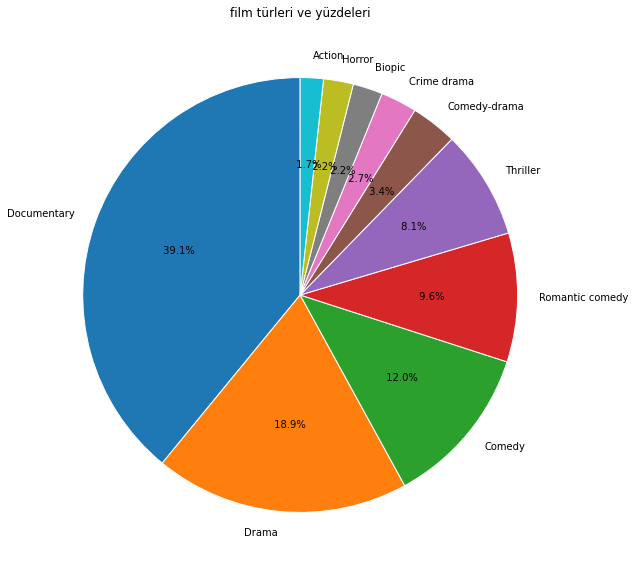

Text(0.5, 1.0, 'film türleri ve yüzdeleri ')

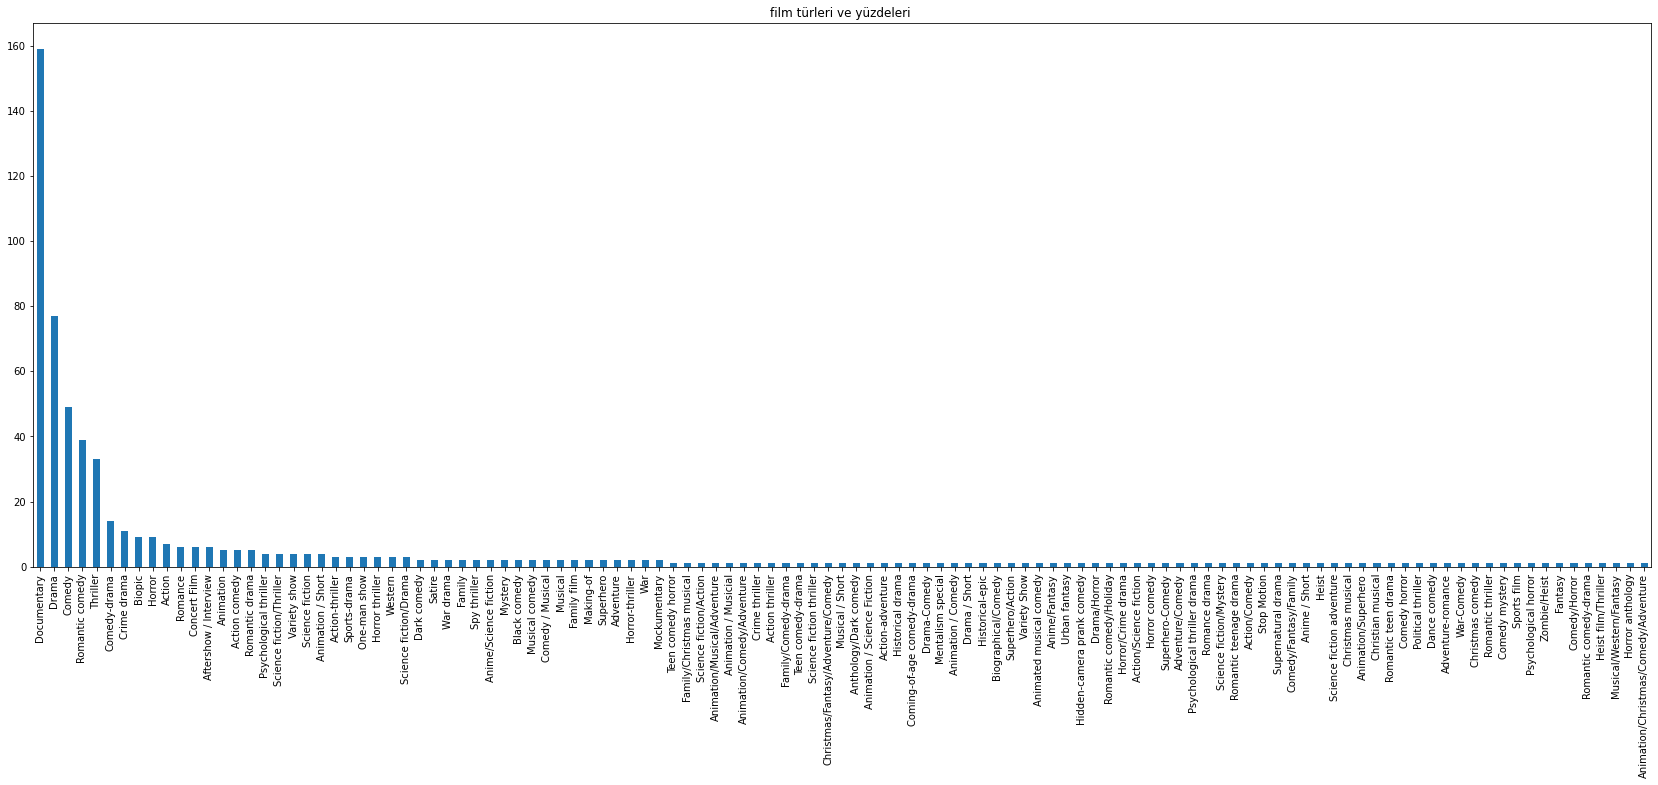

In [ ]:
tur_dckt = dict(ntflx_veri["Genre"].value_counts())
print(f"kategorisi {len(tur_dckt)} var." )

plt.figure(figsize=(15,10))
plt.pie(list(tur_dckt.values())[:10], labels = list(tur_dckt.keys())[:10],autopct=' %.1f%%', startangle=90,
         wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
       )
plt.title("film türleri ve yüzdeleri")
plt.show()

plt.figure(figsize = (29,10))
ntflx_veri.Genre.value_counts().plot(kind='bar')
plt.title("film türleri ve yüzdeleri ")

In [ ]:
ntflx_veri['Language'].value_counts().head(3)

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

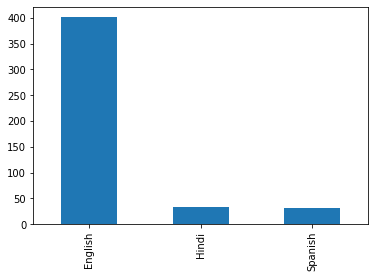

In [ ]:
ilk_3 = ntflx_veri['Language'].value_counts()[0:3]
ilk_3.plot(kind='bar')

In [ ]:
Top10IMDB = ntflx_veri.sort_values('IMDB Score', ascending=False)
Top10IMDB.head(10)
print("En Yüksek IMDB Puanına Sahip En İyi 10 Film:\n{}".format(ntflx_veri[["IMDB Score","Title"]].sort_values(by="IMDB Score",ascending=False, ignore_index=True).head(10)))

KeyError: ignored

In [ ]:
ntflx_veri[["Runtime", "IMDB puan"]].corr()

In [ ]:
cor1 = ntflx_veri[["IMDB Score","Runtime"]]
print("IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır \n{}".format(cor1.corr()))

plt.title('korelasyon')
sns.heatmap(ntflx_veri[['IMDB Score', 'Runtime']].corr(), annot=True, cmap=plt.cm.Reds)

fig = px.scatter(data_frame=ntflx_veri, x="IMDB Score", y="Runtime")
fig.show()

In [ ]:
ilk_10_tur =ntflx_veri[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["IMDB Score"], ascending=False)[:10]
ilk_10_tur

In [ ]:
fig = px.scatter(ilk_10_tur, y= 'Genre', x='IMDB Score', hover_data = ilk_10_tur[['Genre','Premiere','Language']], color='Genre', 
                 title = "En yüksek puanı alan 10 tür")
fig.show()

In [ ]:
ilk_10_runtime = ntflx_veri[["Title","Genre","Premiere","Runtime","IMDB Score","Language"]].sort_values(["Runtime"], ascending=False)[:10]
ilk_10_runtime

In [ ]:
sns.displot(ntflx_veri['Runtime'], color='red')

In [ ]:
fig = px.scatter(ilk_10_runtime, y= 'Title', x='Runtime', hover_data = ilk_10_runtime[['Genre','Premiere','Language']], color='Genre', 
                 title = "Top 10 High Rated Programs")
fig.show()

In [ ]:
ntflx_cpy["Year"] = ntflx_cpy["Premiere"].apply(lambda x: "".join(x for x in x.replace(",","").split()[-1]))
print("The most movies were released in {}..\nNumber of movies released: {}"
      .format(ntflx_cpy["Year"].value_counts().idxmax(),ntflx_cpy["Year"].value_counts().max()))

ntflx_cpy.groupby("Year")["Title"].count().plot(kind="bar")
plt.show()

In [ ]:
ntflx_veri.groupby("Language").agg({"IMDB Score" : "mean"}).sort_values(by = "IMDB Score").head().reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(y="Language", x="IMDB Score", palette = "icefire", data=ntflx_veri.groupby("Language").agg({"IMDB Score" : "mean"}).sort_values(by = "IMDB Score").reset_index())
print("IMDB puanı ortalaması en düşük olan filmlerin dili ve IMDB puanı: \n{0}".format(ntflx_veri[["IMDB Score","Language"]].groupby("Language").mean().sort_values(by="IMDB Score",ascending=True).head(1)))

In [ ]:
SumRuntime = ntflx_cpy[["Runtime","Year"]].groupby("Year").sum()
SumRuntime

In [ ]:
print("Maximum toplam runtime ({}) in {} "
      .format(list(SumRuntime.max())[-1],list(SumRuntime.idxmax())[-1]))
SumRuntime.plot(kind="line")

In [ ]:
print("dile göre en çok izlenen türler: \n{0}".format(ntflx_veri[["Language","Genre"]].groupby("Language").max()))

In [ ]:
plt.kt_grph(ntflx_veri["Runtime"])
plt.title("Runtime kt_grph")
plt.show()

plt.kt_grph(ntflx_veri["IMDB Score"])
plt.title("IMDB Score kt_grph")
plt.show()

print("grafiğe göre her iki değişken için aykırı değerleri görüyoruz.")

In [ ]:
ntflx_veri[['IMDB Score', 'Runtime']].describe()